# GB dataset example

This example uses a small version of the dataset from:

Homer, E. R. et al. Examination of computed aluminum grain boundary structures and energies that span the 5D space of crystallographic character. Acta Materialia 234, 118006 (2022).


In [1]:
from atomrdf import KnowledgeGraph, System

Un archive the dataset into a knowledge graph

In [2]:
kg = KnowledgeGraph.unarchive('kg_gb_small.tar.gz')

Check number of samples

In [3]:
kg.n_samples

20

Programmatically query and list all calculated properties

In [14]:
res = kg.auto_query(kg.terms.cmso.AtomicScaleSample, 
                    [kg.terms.rdfs.label@kg.terms.cmso.CalculatedProperty=='GrainBoundaryEnergy', 
                     kg.terms.asmo.hasValue@kg.terms.cmso.CalculatedProperty],
                   return_df=False,
                   return_query=True)
print(res)

PREFIX cmso: <http://purls.helmholtz-metadaten.de/cmso/>
PREFIX qudt: <http://qudt.org/schema/qudt/>
PREFIX pldo: <http://purls.helmholtz-metadaten.de/pldo/>
PREFIX podo: <http://purls.helmholtz-metadaten.de/podo/>
PREFIX asmo: <http://purls.helmholtz-metadaten.de/asmo/>
PREFIX ns: <http://www.w3.org/ns/>
PREFIX calculation: <https://w3id.org/mdo/calculation/>
PREFIX ldo: <http://purls.helmholtz-metadaten.de/cdos/ldo/>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT DISTINCT ?AtomicScaleSample ?CalculatedProperty_labelvalue ?CalculatedProperty_hasValuevalue
WHERE {
    ?AtomicScaleSample cmso:hasCalculatedProperty ?CalculatedProperty .
    ?CalculatedProperty rdfs:label ?CalculatedProperty_labelvalue .
    ?CalculatedProperty asmo:hasValue ?CalculatedProperty_hasValuevalue .
    ?AtomicScaleSample rdf:type cmso:AtomicScaleSample .
FILTER (?CalculatedProperty_labelvalue="Grain

In [22]:
kg.query(
"""
PREFIX cmso: <http://purls.helmholtz-metadaten.de/cmso/>
PREFIX qudt: <http://qudt.org/schema/qudt/>
PREFIX pldo: <http://purls.helmholtz-metadaten.de/pldo/>
PREFIX podo: <http://purls.helmholtz-metadaten.de/podo/>
PREFIX asmo: <http://purls.helmholtz-metadaten.de/asmo/>
PREFIX ns: <http://www.w3.org/ns/>
PREFIX calculation: <https://w3id.org/mdo/calculation/>
PREFIX ldo: <http://purls.helmholtz-metadaten.de/cdos/ldo/>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT DISTINCT ?AtomicScaleSample ?CalculatedProperty_labelvalue  ?value ?energy
WHERE {
    ?AtomicScaleSample cmso:hasCalculatedProperty ?CalculatedProperty .
    ?AtomicScaleSample cmso:hasMaterial ?material .
    ?material cmso:hasDefect ?defect .
    ?defect pldo:hasSigmaValue ?value .
    ?CalculatedProperty rdfs:label ?CalculatedProperty_labelvalue .
    ?CalculatedProperty asmo:hasValue ?energy
FILTER (?value="3"^^xsd:int)
}
"""
)

,AtomicScaleSample,CalculatedProperty_labelvalue,value,energy
0,sample:08ca21f9-5167-4a9c-a8c0-56a184d90678,GrainBoundaryEnergy,3,75.0
1,sample:08ca21f9-5167-4a9c-a8c0-56a184d90678,GrainBoundaryEnergy,3,206.0
2,sample:08ca21f9-5167-4a9c-a8c0-56a184d90678,GrainBoundaryEnergy,3,303.0
3,sample:08ca21f9-5167-4a9c-a8c0-56a184d90678,GrainBoundaryEnergy,3,328.0
4,sample:08ca21f9-5167-4a9c-a8c0-56a184d90678,GrainBoundaryEnergy,3,354.0
...,...,...,...,...
515,sample:e95c9554-95c5-4662-a77f-5ac1f725c65f,GrainBoundaryExcessVolume,3,0.439884477
516,sample:e95c9554-95c5-4662-a77f-5ac1f725c65f,GrainBoundaryExcessVolume,3,0.450694125
517,sample:e95c9554-95c5-4662-a77f-5ac1f725c65f,GrainBoundaryExcessVolume,3,0.458262841
518,sample:e95c9554-95c5-4662-a77f-5ac1f725c65f,GrainBoundaryExcessVolume,3,0.473775446


In [8]:
count = 0
for r in res:
    print(r)
    count = count + 1
    if count>10:
        break

(rdflib.term.URIRef('sample:08ca21f9-5167-4a9c-a8c0-56a184d90678'), rdflib.term.Literal('GrainBoundaryEnergy'), rdflib.term.Literal('206.0', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#float')))
(rdflib.term.URIRef('sample:08ca21f9-5167-4a9c-a8c0-56a184d90678'), rdflib.term.Literal('GrainBoundaryEnergy'), rdflib.term.Literal('303.0', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#float')))
(rdflib.term.URIRef('sample:08ca21f9-5167-4a9c-a8c0-56a184d90678'), rdflib.term.Literal('GrainBoundaryEnergy'), rdflib.term.Literal('328.0', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#float')))
(rdflib.term.URIRef('sample:08ca21f9-5167-4a9c-a8c0-56a184d90678'), rdflib.term.Literal('GrainBoundaryEnergy'), rdflib.term.Literal('354.0', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#float')))
(rdflib.term.URIRef('sample:08ca21f9-5167-4a9c-a8c0-56a184d90678'), rdflib.term.Literal('GrainBoundaryEnergy'), rdflib.term.Literal('361.0', datatyp

In [ ]:
from atomrdf.n

In [25]:
sg = kg.get_sample('sample:08ca21f9-5167-4a9c-a8c0-56a184d9067')

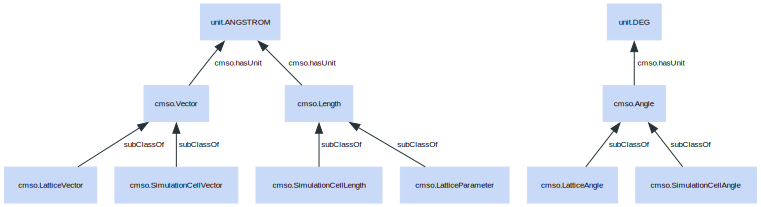

In [27]:
sg.visualise(layout='dot', size=(20,10))